In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
#plt.style.use('dark_background')
%matplotlib inline

# Load in predicted + target + benchmark cubes


In [2]:
test_cube = np.load('../dat/processed/test_cube_target.npy')

pred_cube = np.load('../dat/processed/test_cube_final_prediction.npy')
#benchmark_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/benchmark_cube.npy')


Text(0.5, 1.0, 'True')

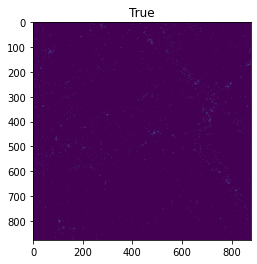

In [3]:
plt.imshow(np.log10(1 + test_cube).mean(axis=1))
plt.title("True")

Text(0.5, 1.0, 'Pred')

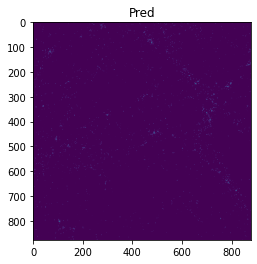

In [5]:
plt.imshow(np.log10(1 + pred_cube).mean(axis=1))
plt.title("Pred")

In [ ]:
plt.imshow(np.log10(1 + benchmark_cube).mean(axis=1))
plt.title("Benchmark")

In [7]:
'%.3e'%pred_cube.sum(), '%.3e'%test_cube.sum()#,'%.3e'%benchmark_cube.sum()

('2.776e+13', '2.834e+13')

In [8]:
import pandas as pd

test_coords = pd.read_csv('../dat/processed/test_coords.csv')

In [9]:
input_nbody = np.load('../dat/sampling/darkmatter/dm371_167_484.npy')

input_subhalo = np.load('../dat/sampling/subhalos/subhalo371_167_484.npy')


In [10]:
test_coords.iloc[[5000]]

,x,y,z,Coordinates,Mode
5000,364.0,564.0,192.0,364_564_192,test


In [11]:
i = 484 - 64
i - 32, i + 32

(388, 452)

NameError: name 'benchmark_cube' is not defined

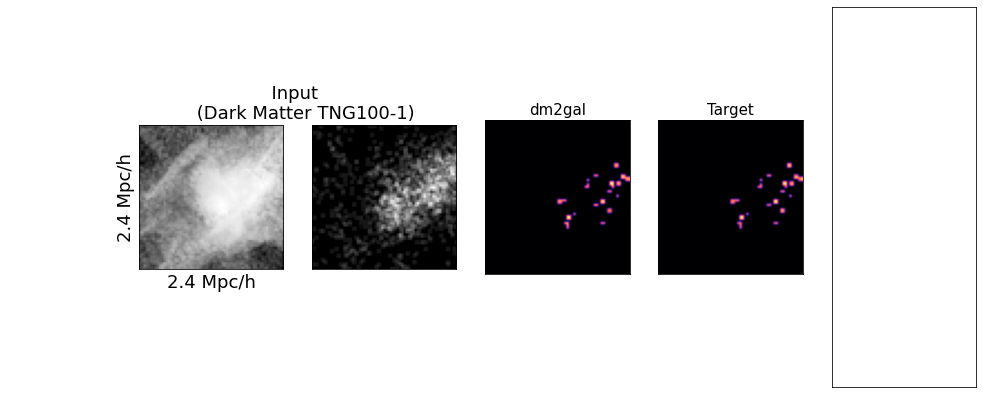

In [12]:

figure, axes = plt.subplots(nrows=1, ncols=5,figsize = (15,7))
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
axes[0].imshow(input_nbody.mean(axis=1),cmap='gray')
axes[0].set_title("                              Input \n                                 (Dark Matter TNG100-1)",fontsize=18)
axes[1].imshow(input_subhalo.mean(axis=1),cmap='gray')

axes[0].set_xlabel("2.4 Mpc/h",fontsize=18)
axes[0].set_ylabel("2.4 Mpc/h",fontsize=18)

interp_method = 'gaussian'
axes[3].imshow(np.log10( 1 + test_cube[271:339,71:135,388:452].mean(axis=1)),interpolation=interp_method,cmap='magma')
axes[3].set_title("Target",fontsize=15)
axes[2].imshow(np.log10( 1 + pred_cube[271:339,71:135,388:452].mean(axis=1)),interpolation=interp_method,cmap='magma')
axes[2].set_title("dm2gal",fontsize=15)

axes[4].imshow(np.log10( 1 + benchmark_cube[271:339,71:135,388:452].mean(axis=1)),interpolation=interp_method,cmap='magma')
axes[4].set_title("HOD",fontsize=15)
#plt.tight_layout()

In [ ]:
75/2048 * 66

In [ ]:
plt.imshow(input_nbody.mean(axis=1),cmap='gray')
plt.imshow(input_subhalo.mean(axis=1),cmap='gray')

In [ ]:
plt.imshow(input_subhalo.mean(axis=1),cmap='gray')

In [ ]:
plt.imshow(np.log10( 1 + pred_cube[271:339,71:135,388:452].mean(axis=1)))

In [ ]:
plt.imshow(np.log10( 1 + test_cube[271:339,71:135,388:452].mean(axis=1)))

In [ ]:
plt.imshow(np.log10( 1 + benchmark_cube[271:339,71:135,388:452].mean(axis=1)))

In [ ]:
test_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_target.npy')
#pred_cube1 = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_version_5252039_version_5252039_prediction.npy')
pred_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_version_5252039_version_5235337_prediction.npy')
    
#pred_cube2 = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_version_5252038_version_5252038_prediction.npy')

In [ ]:
#pred_cube = .5* (pred_cube1 + pred_cube2)

In [13]:
import Pk_library as PKL
BoxSize = 31.82373046875
MAS = None
threads = 8
axis = 0


In [14]:

Pk = PKL.Pk(pred_cube, BoxSize, axis, MAS, threads)

# 3D P(k)
k       = Pk.k3D
Pk_pred     = Pk.Pk[:,0] #monopole


Computing power spectrum of the field...
Time to complete loop = 35.93
Time taken = 100.21 seconds


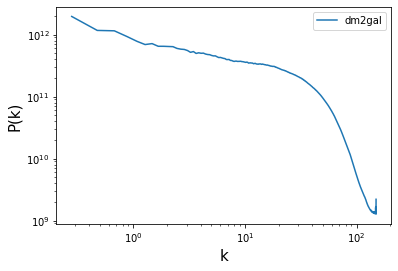

In [15]:
plt.plot(k,Pk_pred,label = 'dm2gal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k',fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.legend()

In [16]:

Pk = PKL.Pk(test_cube, BoxSize, axis, MAS, threads)

# 3D P(k)
k       = Pk.k3D
Pk_target     = Pk.Pk[:,0] #monopole


Computing power spectrum of the field...
Time to complete loop = 35.82
Time taken = 99.85 seconds


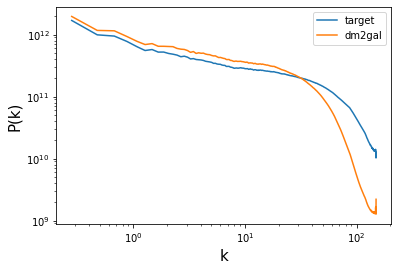

In [17]:
plt.plot(k,Pk_target,label = 'target')
plt.plot(k,Pk_pred,label = 'dm2gal')
#plt.plot(k,Pk_benchmark,label = 'benchmark')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k',fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.legend()

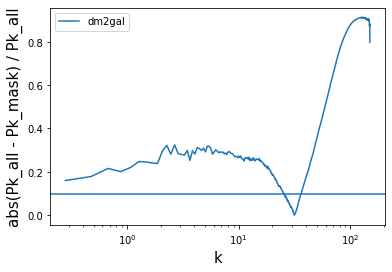

In [18]:
#plt.plot(k,abs(Pk_target - Pk_benchmark) / Pk_target,'g' ,label = 'benchmark')
plt.plot(k,abs(Pk_target - Pk_pred) / Pk_target ,label = 'dm2gal')

plt.axhline(.1,)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('k',fontsize = 15)
plt.ylabel('abs(Pk_all - Pk_mask) / Pk_all',fontsize = 15)
plt.legend()

In [ ]:
test_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_target.npy')

pred_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/test_cube_version_5252039_version_5235337_prediction.npy')

benchmark_cube = np.load('/projects/QUIJOTE/Noah/dm2gal/dat/processed/central-prediction/benchmark_cube.npy')


In [19]:
pred_cube = pred_cube[pred_cube != 0] 
test_cube = test_cube[test_cube != 0] 
#benchmark_cube = benchmark_cube[benchmark_cube !=0]

NameError: name 'benchmark_cube' is not defined

In [ ]:
'%.3e'%pred_cube.sum(), '%.3e'%test_cube.sum(),'%.3e'%benchmark_cube.sum()

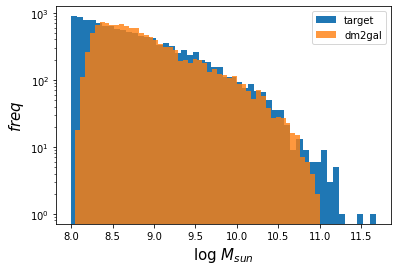

In [20]:
plt.hist(np.log10(test_cube.flatten()) ,label='target',bins=50)
plt.hist(np.log10(pred_cube.flatten())  ,label = 'dm2gal',bins=50,alpha=.8)
#plt.hist(np.log10(benchmark_cube.flatten()) ,label='benchmark',bins=50,alpha=.6)

plt.xlabel("log $M_{sun}$",fontsize = 15)
plt.ylabel("$freq$",fontsize = 15)
plt.legend()


plt.yscale('log')
#plt.xscale('log')

Factor of 3 off. It's not a problem of clustering, it's a problem of matching the amplitude